Linear (in x) model

$ $$y^p$$ = m $$x$$ + b $, results in the following error

$e(m, b)=\sum_{i=0}^{n-1} ($$y^t_i$$ -m $$x_i$$ -b)^2$ <br>


Non-linear (in x) model

$ $$y^p$$ = r $$x^3$$ + s $$x^2$$  + m $$x$$ +b $, results in the following loss

$e(r, s, m, b)=\sum_{i=0}^{n-1} ($$y^t_i$$ -r \space $$x^3_i$$ -s \space $$x^2_i$$ -m \space $$x_i$$ -b)^2$ <br>


$r, s, m$ and $b$ are constants. Superscript integers represent powers (exponentiation).

Note that $ $$y^p$$ $ is still $\underline {linear} $ in $r, s, m$ and $b$.

$\frac{\partial e}{\partial m}$ <br>


= $\frac {\partial } {\partial m} ( \sum_{i=0}^{n-1} (y^t_i  -r \space $$x^3_i$$ -s \space $$x^2_i$$ -m \space $$x_i$$ -b)^2 ) $


$ = \sum_{i=0}^{n-1} \frac {\partial (y^t_i -r \space x^3_i -s \space x^2_i -m \space x_i -b)^2 } {\partial m} $ <br>

$ = \sum_{i=0}^{n-1} 2(y^t_i -r \space x^3_i -s \space x^2_i -m \space x_i -b) \frac {\partial (y^t_i -r \space x^3_i -s \space x^2_i -m \space x_i -b) } {\partial m} $ <br>


$ = \sum_{i=0}^{n-1} 2(y^t_i -r \space x^3_i -s \space x^2_i -m \space x_i -b) (-x_i) $ <br>

$ = -2 \sum_{i=0}^{n-1}e_ix_i$

where $ e_i = (y^t_i -r \space x^3_i -s \space x^2_i -m \space x_i -b)$. Using the bar notation, where bar means average,

$\frac{1}{n} \frac{\partial e}{\partial m} = -2 \overline {ex} $. &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  &emsp; &emsp;  &nbsp; $(1)$<br>

Similarly, we can derive

$\frac{1}{n} \frac{\partial e}{\partial b} = -2 \overline {e} $, &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  &emsp; &emsp;  &emsp; $(2)$

$\frac{1}{n} \frac{\partial e}{\partial r} = -2 \overline {ex^3} $, &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  &emsp; &emsp;  $(3)$

and

$\frac{1}{n} \frac{\partial e}{\partial s} = -2 \overline {ex^2} $. &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  &emsp; &emsp;  $(4)$


Assume initial values for $m, b, r$ and $s$. Then iterate using,

$m = m - C \frac{\partial e}{\partial m}$

$b = b - C \frac{\partial e}{\partial b}$

$r = r - C \frac{\partial e}{\partial r}$

$s = s - C \frac{\partial e}{\partial s}$

In [36]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import math
from torch import nn
from torch import Tensor
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import gensim.downloader as api
from gensim.models import Word2Vec
w2v_news_obj = api.load('word2vec-google-news-300')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\merug\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\merug\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
x, y = np.loadtxt('data.txt')
xS = 12*x-6
print(xS.min(), xS.max())
df = pd.DataFrame({"x": x, "y_true": y})
noise = np.random.normal(0, 0.05, len(df))
df['y_true'] = 2*df['x']*df['x']*df['x'] + 0.5*df['x'] + 5 + noise
df['x3'] = df['x']*df['x']*df['x']
df['x2'] = df['x']*df['x']
df['x0'] = np.ones(len(df))
df['xS'] = xS
yt_min = df.y_true.min()
yt_range = df.y_true.max() - yt_min
df['y_true'] = (df['y_true'] - yt_min)/yt_range
print(df.y_true.min(), df.y_true.max())

-5.675305481334444 5.563812220118603
0.0 1.0


In [38]:
# tx = torch.tensor(df[['x3','x2','x', 'x0']].to_numpy())
#tx = torch.tensor(df[['xS', 'x0']].to_numpy())
tx = torch.tensor(df[['x']].to_numpy())
y_true = torch.tensor(df['y_true'].to_numpy(), dtype=torch.float).unsqueeze(1)

In [39]:
C=0.1

In [40]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.lin = nn.Sequential(
            nn.Linear(1, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )
        
    def forward(self, input: Tensor) -> Tensor:
        input = input.float()
        return self.lin(input)


In [41]:
# def loss_fn(y_pred, y_true):
#     e = y_pred - y_true
#     return (e*e).mean()
loss_fn = nn.MSELoss()

In [42]:
#print('pm before: ', pm1, pm2)
y_pred = None
loss = None
lm = LinearModel()
#lm = lm.double()
optimizer = torch.optim.SGD(lm.parameters(), lr=C)
for p in lm.parameters():
    print('pm before: ', p, p.grad)
for iter in range(5001):
    #y_pred = forward(tx, pm1, pm2)
    y_pred = lm(tx)
    loss = loss_fn(y_pred, y_true)
    if iter%500 == 0:
        print('iter, loss: ', iter, loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#print('pm after: ', pm1, pm2)
for p in lm.parameters():
    print('pm after: ', p, p.grad)
print('loss after: ', loss)

pm before:  Parameter containing:
tensor([[-0.2580],
        [ 0.7558],
        [-0.3918],
        [ 0.1405]], requires_grad=True) None
pm before:  Parameter containing:
tensor([ 0.6149,  0.2266, -0.6179, -0.1998], requires_grad=True) None
pm before:  Parameter containing:
tensor([[ 0.0885,  0.4712, -0.2893,  0.0498],
        [ 0.1773,  0.1198,  0.0410,  0.3134],
        [ 0.2929, -0.2637,  0.2388, -0.2808],
        [ 0.2829, -0.3565, -0.3640, -0.4859]], requires_grad=True) None
pm before:  Parameter containing:
tensor([-0.3043,  0.2026,  0.2544,  0.2483], requires_grad=True) None
pm before:  Parameter containing:
tensor([[-0.3677,  0.1362, -0.2839, -0.2362]], requires_grad=True) None
pm before:  Parameter containing:
tensor([0.3923], requires_grad=True) None
iter, loss:  0 tensor(0.1417, grad_fn=<MseLossBackward0>)
iter, loss:  500 tensor(0.0199, grad_fn=<MseLossBackward0>)
iter, loss:  1000 tensor(0.0061, grad_fn=<MseLossBackward0>)
iter, loss:  1500 tensor(0.0035, grad_fn=<MseLossBa

In [43]:
df['y_pred'] = y_pred.detach().numpy()

<Axes: xlabel='x'>

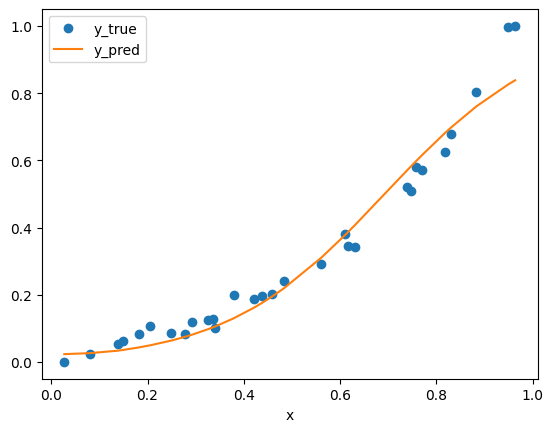

In [44]:
df.sort_values('x').plot(x="x", y=["y_true", "y_pred"], style=['o','-'])

In [45]:
train_text=pd.read_csv('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/val_text.txt',sep='delimiter',header=None,names=['text'])
label_train =pd.read_csv('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/val_labels.txt',header=None,names=['label'])

C:\Users\merug\AppData\Local\Temp\ipykernel_11936\515232985.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_text=pd.read_csv('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/val_text.txt',sep='delimiter',header=None,names=['text'])


In [46]:
stop_words = set(stopwords.words('english'))
def preprocess(txt):
    txt = txt.lower()
    txt = re.sub(r'#\w+', '', txt)
    txt = re.sub(r'http\S+', '', txt)
    txt = re.sub(r'@\w+', '', txt)
    txt = re.sub(r'[^\w\s]', '', txt)
    txt = re.sub(r'\d+', '', txt)
    tokens = word_tokenize(txt)
    tokens_f=[]
    for i in tokens:
        if i not in tokens:
            tokens_f.append(i)
    return ' '.join(tokens)

In [47]:
train_text['text'].apply(preprocess)

0       dark souls april launch date confirmed with ne...
1       national hot dog day national tequila day then...
2       when girls become bandwagon fans of the packer...
3          i may or may not have searched it up on google
4       heres your starting tuesday morning line up at...
                              ...                        
1995    london ap prince george celebrates his second ...
1996    harpers worst offense against refugees may be ...
1997    hold on sam smith may do the theme to spectre ...
1998    gon na watch final destination tonight i alway...
1999    interview with devon alexander speed kills vid...
Name: text, Length: 2000, dtype: object

In [48]:
data=pd.DataFrame({'text':train_text['text'].tolist(),'label':label_train['label'].tolist()})

In [49]:
def get_embedding(text):
    if isinstance(text, str):
        wrd = text.split()
    elif isinstance(text, list):
        wrd = text
    else:
        wrd = [text]
    emdbgs = []
    for w in wrd:
        if w in w2v_news_obj.key_to_index.keys():
            emdbgs.append(w2v_news_obj[w])
    if len(emdbgs) == 0:
        return np.zeros(w2v_news_obj.vector_size)
    else:
        return np.mean(emdbgs, axis=0)



In [50]:
emdb_df=data['text'].apply(get_embedding)

In [51]:
a, b = emdb_df.apply(lambda x: (x[0], x[1])).apply(pd.Series).values.T
aS = 12*a-6
print(aS.min(), aS.max())
df = pd.DataFrame({"a": a, "b_true": b})
noise = np.random.normal(0, 0.05, len(df))
df['b_true'] = 2*df['a']*df['a']*df['a'] + 0.5*df['a'] + 5 + noise
df['a3'] = df['a']*df['a']*df['a']
df['a2'] = df['a']*df['a']
df['a0'] = np.ones(len(df))
df['aS'] = aS
bt_min = df.b_true.min()
bt_range = df.b_true.max() - bt_min
df['b_true'] = (df['b_true'] - bt_min)/bt_range
print(df.b_true.min(), df.b_true.max())
ta = torch.tensor(df[['a']].to_numpy())
b_true = torch.tensor(df['b_true'].to_numpy(), dtype=torch.float).unsqueeze(1)
C=0.1

-8.163281 -3.362235
0.0 1.0


C:\Users\merug\AppData\Local\Temp\ipykernel_11936\1780142972.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  a, b = emdb_df.apply(lambda x: (x[0], x[1])).apply(pd.Series).values.T


In [52]:
class LinearModel(nn.Module):
    def __init__(sf):
        super(LinearModel, sf).__init__()
        sf.lin = nn.Sequential(
            nn.Linear(1, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )
        
    def forward(sf, input: Tensor) -> Tensor:
        input = input.float()
        return sf.lin(input)


In [53]:
loss_fn = nn.MSELoss()
#print('pm before: ', pm1, pm2)
b_pred = None
loss = None
lmd = LinearModel()
#lm = lm.double()
optzr = torch.optim.SGD(lmd.parameters(), lr=C)
for p in lmd.parameters():
    print('pm before: ', p, p.grad)
for iter in range(5001):
    #y_pred = forward(tx, pm1, pm2)
    b_pred = lmd(ta)
    loss = loss_fn(b_pred, b_true)
    if iter%500 == 0:
        print('iter, loss: ', iter, loss)
    optzr.zero_grad()
    loss.backward()
    optzr.step()

#print('pm after: ', pm1, pm2)
for p in lmd.parameters():
    print('pm after: ', p, p.grad)
print('loss after: ', loss)

pm before:  Parameter containing:
tensor([[ 0.7019],
        [ 0.6924],
        [-0.9905],
        [-0.7764]], requires_grad=True) None
pm before:  Parameter containing:
tensor([ 0.9521,  0.7836, -0.6942, -0.4726], requires_grad=True) None
pm before:  Parameter containing:
tensor([[-0.0145,  0.0308, -0.2253, -0.4901],
        [-0.1842,  0.0249, -0.4161, -0.2832],
        [-0.4466,  0.1228,  0.3948,  0.4218],
        [-0.0960,  0.2625, -0.1367, -0.3298]], requires_grad=True) None
pm before:  Parameter containing:
tensor([-0.1877, -0.3322,  0.3255,  0.0891], requires_grad=True) None
pm before:  Parameter containing:
tensor([[ 0.0656,  0.2827,  0.0188, -0.3013]], requires_grad=True) None
pm before:  Parameter containing:
tensor([0.3551], requires_grad=True) None
iter, loss:  0 tensor(0.0297, grad_fn=<MseLossBackward0>)
iter, loss:  500 tensor(0.0247, grad_fn=<MseLossBackward0>)
iter, loss:  1000 tensor(0.0247, grad_fn=<MseLossBackward0>)
iter, loss:  1500 tensor(0.0247, grad_fn=<MseLossBa

<Axes: xlabel='a'>

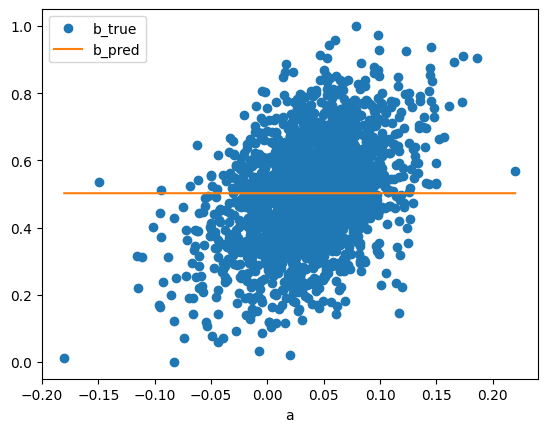

In [54]:
df['b_pred'] = b_pred.detach().numpy()
df.sort_values('a').plot(x="a", y=["b_true", "b_pred"], style=['o','-'])

In [55]:
#data = pd.read_csv('data.txt', delimiter='\t', header=None, names=['text', 'label'])
#print(data)
data['label'] = pd.factorize(data['label'])[0] 
labels = ['negative','neutral','positive']
word2idx = {}
idx = 0
maxi=0
for text in data['text']:
    maxi=max(maxi,len(text.split()))
    for word in text.split():
        if word not in word2idx:
            word2idx[word] = idx
            idx += 1
print(maxi)
data['text'] = data['text'].apply(lambda x: [word2idx[word] for word in x.split()])


31


In [56]:
data.shape

(2000, 2)

In [57]:
data

,text,label
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0
1,"[13, 14, 15, 16, 17, 18, 16, 19, 17, 20, 21, 2...",1
2,"[27, 28, 29, 30, 31, 32, 11, 33, 34, 32, 35, 3...",2
3,"[48, 49, 50, 51, 50, 52, 53, 54, 55, 56, 57, 58]",0
4,"[59, 60, 61, 62, 63, 64, 56, 65, 66, 67, 68, 6...",0
...,...,...
1995,"[11550, 11551, 2211, 2416, 736, 11552, 726, 31...",0
1996,"[7534, 11555, 11556, 1739, 11557, 50, 228, 115...",0
1997,"[11563, 5003, 2283, 3858, 50, 243, 11, 2671, 7...",1
1998,"[555, 295, 11569, 11570, 414, 2508, 49, 1070, ...",0


In [58]:
for i in range(2000):
    l=data.iloc[i]['text']
    x=maxi-len(l)
    xl=[0]*x
    l.extend(xl)
    data.iloc[i]['text']=xl
    

C:\Users\merug\AppData\Local\Temp\ipykernel_11936\3212239079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]['text']=xl


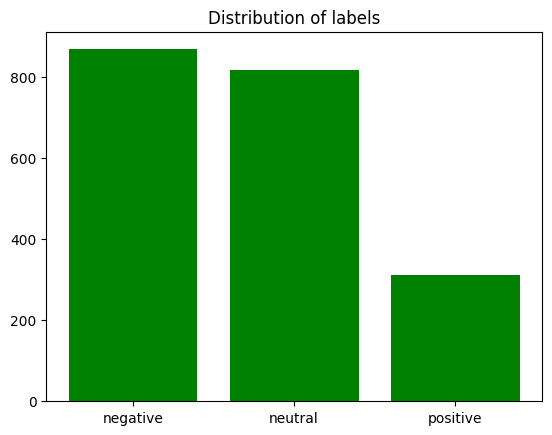

In [59]:
plt.bar(labels,data['label'].value_counts(),color='green')
plt.title('Distribution of labels')
plt.show()


In [60]:
from sklearn import metrics
def evaluate_metric(model, ldr, crtr):
    model.eval()
    crrt=0
    ttl=0
    true_positive=0 
    false_positive=0
    true_negative=0
    false_negative=0
    loss_l = []
    with torch.no_grad():
        for text, lbl in ldr:
            otp = model(text)
            loss = crtr(otp, lbl)
            loss_l.append(loss.item())
            _, pdt = torch.max(otp.data, 1)
            ttl += lbl.size(0)
            crrt += (pdt == lbl).sum().item()
            true_positive = true_positive+((pdt == 1) & (lbl == 1)).sum().item()
            false_positive = false_positive+ ((pdt == 1) & (lbl == 0)).sum().item()
            true_negative = true_negative+((pdt == 0) & (lbl == 0)).sum().item()
            false_negative = false_negative+((pdt == 0) & (lbl == 1)).sum().item()

    acc = crrt / ttl
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return [acc, precision, recall, f1_score]

In [61]:
from torch.utils.data import Dataset, DataLoader
#we are initializing the model using single layer(linear) and softmax to rescale data
#v_size is the size of word2idx which is the size of embeddings
class Word2VecModel(nn.Module):
    def __init__(slf, v_size, embd_dim, hd_dim, no_labels):
        super(Word2VecModel, slf).__init__()
        slf.embedding = nn.Embedding(v_size, embd_dim)
        slf.fc1 = nn.Linear(embd_dim, hd_dim)
        slf.relu = nn.ReLU()
        slf.fc2 = nn.Linear(hd_dim, no_labels)
        slf.softmax = nn.Softmax(dim=1)
        
    def forward(slf, aa):
        aa = slf.embedding(aa)
        aa = torch.mean(aa, dim=1)
        aa = slf.fc1(aa)
        aa= slf.relu(aa)
        aa = slf.fc2(aa)
        aa = slf.softmax(aa)
        return aa
class DatasetModel(Dataset):
    def __init__(slf, data):
        slf.data = data
    def __getitem__(slf, idx):
        label = torch.tensor(slf.data.iloc[idx]['label'])
        text = torch.tensor(slf.data.iloc[idx]['text'])
        return text, label
    def __len__(slf):
        return len(slf.data)

In [62]:
dataobj = DatasetModel(data)
ldr = DataLoader(dataobj, batch_size=32, shuffle=True)
model = Word2VecModel(len(word2idx), 50, 100, 3)
crtr = nn.CrossEntropyLoss()
optzr = torch.optim.Adam(model.parameters(), lr=0.01)
for epch in range(12):
    for batch_idx, (text, lbl) in enumerate(ldr):
        optzr.zero_grad()
        otp = model(text)
        loss = crtr(otp, lbl)
        loss.backward()
        optzr.step()
    ccep=epch+1
    metricl=evaluate_metric(model, ldr, crtr)
    print(f"Epoch {ccep}, Loss: {loss.item()*100}",'accuracy: ',metricl[0]*100,'precision: ',metricl[1]*100,'recall: ',metricl[2]*100,'F1-score: ',metricl[3]*100)



Epoch 1, Loss: 107.5747013092041 accuracy:  53.65 precision:  57.391304347826086 recall:  96.7032967032967 F1-score:  72.03274215552524
Epoch 2, Loss: 104.83098030090332 accuracy:  74.3 precision:  90.75297225891677 recall:  83.88278388278388 F1-score:  87.18274111675126
Epoch 3, Loss: 82.67980813980103 accuracy:  86.6 precision:  95.83333333333334 recall:  98.531211750306 F1-score:  97.1635485817743
Epoch 4, Loss: 57.69897699356079 accuracy:  94.15 precision:  98.8943488943489 recall:  98.29059829059828 F1-score:  98.59154929577466
Epoch 5, Loss: 56.41598701477051 accuracy:  96.0 precision:  99.51100244498777 recall:  99.51100244498777 F1-score:  99.51100244498777
Epoch 6, Loss: 66.81691408157349 accuracy:  98.45 precision:  99.39172749391727 recall:  99.87775061124694 F1-score:  99.6341463414634
Epoch 7, Loss: 56.673043966293335 accuracy:  99.0 precision:  99.87760097919217 recall:  99.75550122249389 F1-score:  99.81651376146789
Epoch 8, Loss: 55.69196343421936 accuracy:  99.35000000

In [63]:
#After running model the model improving accuracy 

In [64]:
'''test_text=pd.read_csv('https://github.com/cardiffnlp/tweeteval/blob/main/datasets/sentiment/test_text.txt?raw=true',sep='delimiter',header=None,names=['text'])
label_test =pd.read_csv('https://github.com/cardiffnlp/tweeteval/blob/main/datasets/sentiment/test_labels.txt?raw=true',header=None,names=['label'])
data2=pd.DataFrame({'text':test_text['text'].tolist(),'label':label_test['label'].tolist()})
classes = ['negative','neutral','positive']
word2idx = {}
idx = 0
maxi=0
for text in data2['text']:
    maxi=max(maxi,len(text.split()))
    for word in text.split():
        if word not in word2idx:
            word2idx[word] = idx
            idx += 1
print(maxi)
data2['text'] = data2['text'].apply(lambda x: [word2idx[word] for word in x.split()])
for i in range(12284):
  l=data2.iloc[i]['text']
  x=maxi-len(l)
  xl=[0]*x
  l.extend(xl)
  data2.iloc[i]['text']=xl

'''


"test_text=pd.read_csv('https://github.com/cardiffnlp/tweeteval/blob/main/datasets/sentiment/test_text.txt?raw=true',sep='delimiter',header=None,names=['text'])\nlabel_test =pd.read_csv('https://github.com/cardiffnlp/tweeteval/blob/main/datasets/sentiment/test_labels.txt?raw=true',header=None,names=['label'])\ndata2=pd.DataFrame({'text':test_text['text'].tolist(),'label':label_test['label'].tolist()})\nclasses = ['negative','neutral','positive']\nword2idx = {}\nidx = 0\nmaxi=0\nfor text in data2['text']:\n    maxi=max(maxi,len(text.split()))\n    for word in text.split():\n        if word not in word2idx:\n            word2idx[word] = idx\n            idx += 1\nprint(maxi)\ndata2['text'] = data2['text'].apply(lambda x: [word2idx[word] for word in x.split()])\nfor i in range(12284):\n  l=data2.iloc[i]['text']\n  x=maxi-len(l)\n  xl=[0]*x\n  l.extend(xl)\n  data2.iloc[i]['text']=xl\n\n"

In [65]:
from sklearn.metrics import confusion_matrix
model.eval()
for text,label in ldr:
    otp=model(torch.tensor(data['text']))
    predict=torch.argmax(otp, dim=1).numpy()
cfs_mat=confusion_matrix(data['label'].to_numpy(), predict)
print(cfs_mat)

[[868   0   1]
 [  2 817   0]
 [  3   2 307]]


In [66]:
otp

tensor([[9.9999e-01, 1.9004e-06, 4.1811e-06],
        [1.1631e-06, 1.0000e+00, 1.2449e-07],
        [9.9992e-01, 7.1492e-05, 6.9108e-06],
        ...,
        [7.1746e-04, 9.9928e-01, 2.2558e-06],
        [9.9997e-01, 1.9125e-05, 1.2810e-05],
        [1.0000e+00, 4.5641e-11, 5.9402e-13]], grad_fn=<SoftmaxBackward0>)

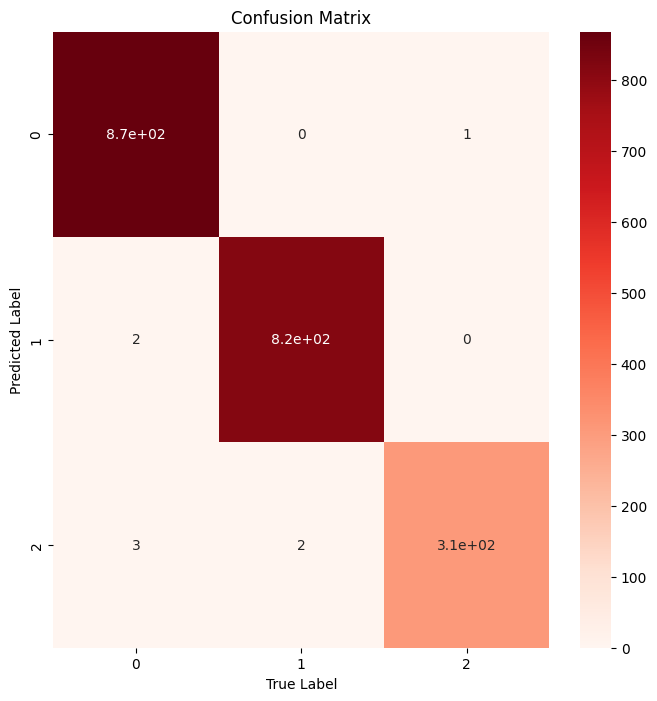

In [67]:
plt.figure(figsize=(8, 8))
sns.heatmap(cfs_mat, annot=True, cmap="Reds")
plt.xlabel("True Label")
plt.title("Confusion Matrix")
plt.ylabel("Predicted Label")
plt.show()
